# Задание 4. Credit Card Fraud Detection

In [6]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [134]:
#проверим доступен ли стиль fivethirtyeight (вывод списка всех доступных стилей!)
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [135]:
# применим стиль графиков 'fivethirtyeight'
plt.style.use('fivethirtyeight')

In [39]:
#подгрузим датасет
DATASET_PATH = 'creditcard.csv'
df = pd.read_csv(DATASET_PATH, sep=',')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [136]:
#подсчет кол-ва транзакций в разрезе мошеннические/обычные
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [9]:
#сводный датасет в разрезе мошеннические/обычные транзакции
data_for_bars = df.groupby('Class').agg({'Class': 'count'})
data_for_bars = data_for_bars.rename(columns={'Class': 'Transactions'})
data_for_bars

,Transactions
Class,
0,284315
1,492


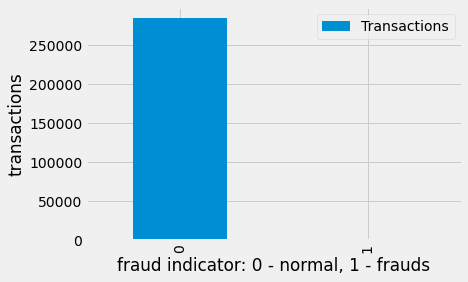

In [137]:
# столбчатая диаграмма в натуральном выражении (данные "как есть")
data_for_bars.plot(kind='bar')
plt.xlabel('fraud indicator: 0 - normal, 1 - frauds')
plt.ylabel('transactions')
plt.show()

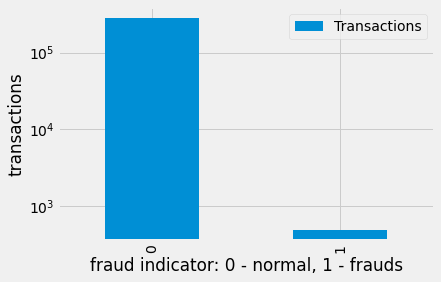

In [11]:
# столбчатая диаграмма в логарифмическом масштабе
data_for_bars.plot(kind = 'bar', logy=True)
plt.xlabel('fraud indicator: 0 - normal, 1 - frauds')
plt.ylabel('transactions')
plt.show()

In [138]:
#отбор V1 (готовим данные для гистограмм по признаку V1!)
df_v1 = df.loc[:, ['V1', 'Class']]
df_v1_1 = df_v1[df['Class'] == 1].reset_index()
del df_v1_1['index']
df_v1_0 = df_v1[df['Class'] == 0].reset_index()
del df_v1_0['index']
print(df_v1_0.sample())
print(df_v1_1.sample())

              V1  Class
103752 -0.881789      0
           V1  Class
189 -2.335655      1


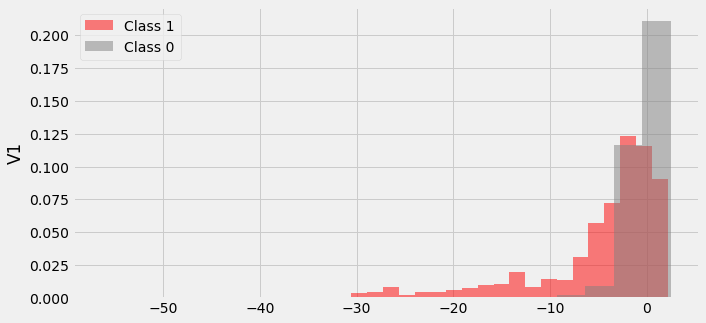

In [139]:
# Строим гистограммы распределения транзакций по V1 (два графика на одной фигуре размера 10*5 дюймов)
plt.figure(figsize=(10, 5)) #зададим область графика
plt.hist(df_v1_1['V1'], bins=20, color = 'red', label='Class 1', density = True, alpha=0.5) #рисуем красные столбики(транзакции мошенников)
plt.hist(df_v1_0['V1'], bins=20, color = 'grey', label='Class 0', density = True, alpha=0.5) #рисуем серые столбики (транзакции нормальные)
plt.ylabel('V1') #добавим подпись оси y
plt.legend() #добавим легенду
plt.show() #визуализация гистограмм